In [1]:
# Due to huge number of records,for loop might take max 10 minutes

In [2]:
#                                         Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
# For seaborn visualization
%matplotlib inline

In [5]:
# Assume athelet_events = df
df=pd.read_csv(r'C:\Users\hp\Desktop\athlete_events.csv')
noc_regions=pd.read_csv(r'C:\Users\hp\Desktop\noc_regions.csv')
medals=pd.read_excel(r'C:\Users\hp\Desktop\Medals.xlsx')

# Data Cleaning

## Handling Missing Values

<AxesSubplot:>

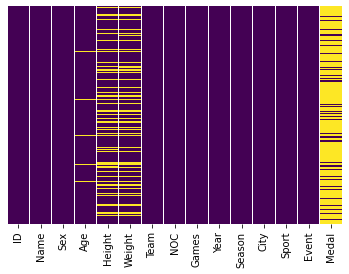

In [6]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
#Converting Medal Column to a appropriate value
df['Medal'].fillna('No Medal',inplace=True)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

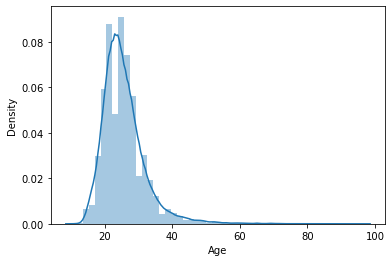

In [8]:
# Showing skeweness of distribution
sns.distplot(df['Age'])

In [9]:
# Filling missing values in Age column using "Multivariate Imputation(Age)"
gb=round(df.groupby(['Event']).mean()['Age'])
for i in range(len(df['Age'])):
    if df['Age'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        check_Null=gb[event_loc]
        if check_Null!=check_Null:
#             Since distribution is skewed
            df['Age'].iloc[i]=round(df['Age'].median()) 
        else:
            df['Age'].iloc[i]=gb[event_loc]

<Figure size 7200x3600 with 0 Axes>

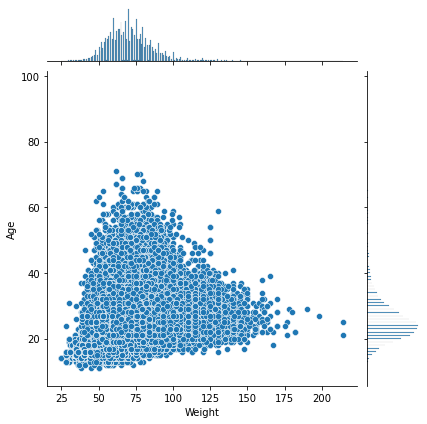

In [10]:
# Correlation between Age and Weight Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Weight',y='Age',data=df)

In [11]:
# Filling missing values in Weight column using "Multivariate Imputation(Event,Age)"
gb=df.groupby(['Event','Age']).mean()['Weight']
for i in range(len(df['Weight'])):
    if df['Weight'].isnull().iloc[i]:
        event_loc=df['Event'].iloc[i]
        age_loc=df['Age'].iloc[i]
        check_Null=gb[event_loc][age_loc]
        if check_Null!=check_Null:
            df['Weight'].iloc[i]=df['Weight'].mean()
        else:    
            df['Weight'].iloc[i]=gb[event_loc][age_loc]

<Figure size 7200x3600 with 0 Axes>

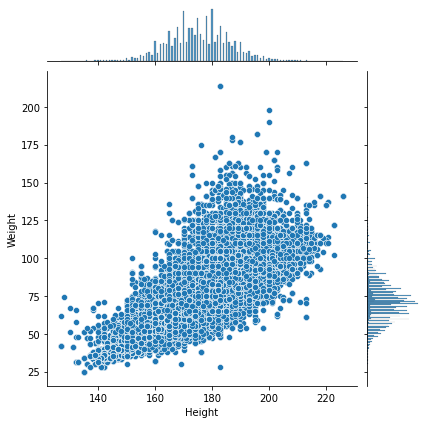

In [12]:
# Correlation between Weight and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Weight',data=df)

<Figure size 7200x3600 with 0 Axes>

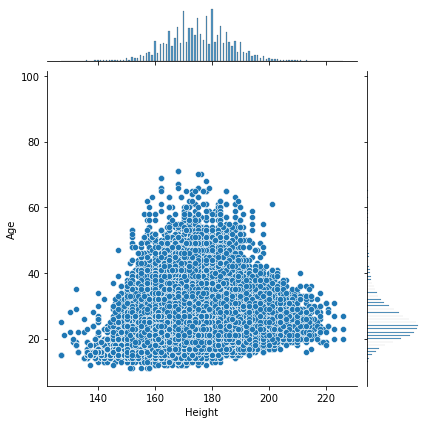

In [13]:
# Correlation between Age and Height Columns
plt.figure(figsize=(100,50))
sns.jointplot(x='Height',y='Age',data=df)

In [14]:
# Filling missing values in Height column using "Multivariate Imputation(Weight,Age)"
gb=df.groupby(['Weight','Age']).mean()['Height']
for i in range(len(df['Height'])):
    if df['Height'].isnull().iloc[i]:
        weight_Loc=df['Weight'].iloc[i]
        age_Loc=df['Age'].iloc[i]
        check_Null=gb[weight_Loc][age_Loc]
        if check_Null!=check_Null:
            df['Height'].iloc[i]=df['Height'].mean()
        else:    
            df['Height'].iloc[i]=gb[weight_Loc][age_Loc]

<AxesSubplot:>

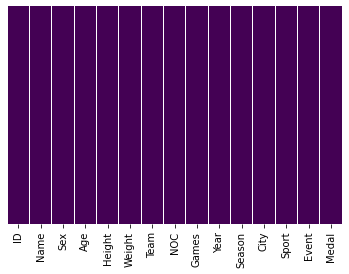

In [15]:
#Heatmap showing off the missing values in each column
# plt.figure(figsize=(10,20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling Outliers

No. of outliers in Age:  12775
No. of outliers in Height:  6334
No. of outliers in weight:  5819
(258341, 15)


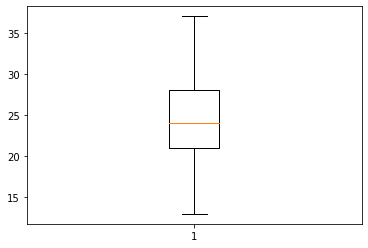

(252063, 15)


<ipython-input-16-edac3c0e34b8>:46: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[(~mask_Height)]


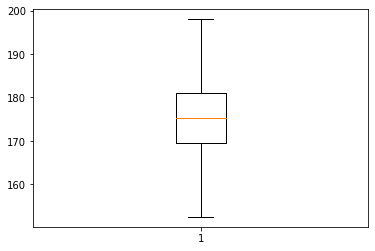

(248002, 15)

<ipython-input-16-edac3c0e34b8>:57: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[(~mask_Weight)]


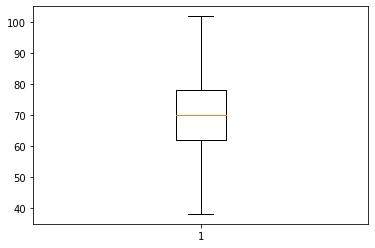

In [16]:
#Identifying outliers in Age column 
Q1_Age = df['Age'].quantile(0.25)
Q3_Age = df['Age'].quantile(0.75)
IQR_Age = Q3_Age - Q1_Age


arr_1_Age = df['Age'] < (Q1_Age - 1.5 * IQR_Age)
arr_2_Age = df['Age'] > (Q3_Age + 1.5 * IQR_Age)
mask_Age = (arr_1_Age | arr_2_Age)
print("No. of outliers in Age: ", mask_Age.sum())

#Identifying outliers in Height column 
Q1_Height = df['Height'].quantile(0.25)
Q3_Height = df['Height'].quantile(0.75)
IQR_Height = Q3_Height - Q1_Height


arr_1_Height = df['Height'] < (Q1_Height - 1.5 * IQR_Height)
arr_2_Height = df['Height'] > (Q3_Height + 1.5 * IQR_Height)
mask_Height = (arr_1_Height | arr_2_Height)
print("No. of outliers in Height: ", mask_Height.sum())

#Identifying outliers in Weight column 
Q1_Weight = df['Weight'].quantile(0.25)
Q3_Weight = df['Weight'].quantile(0.75)
IQR_Weight = Q3_Weight - Q1_Weight


arr_1_Weight = df['Weight'] < (Q1_Weight - 1.5 * IQR_Weight)
arr_2_Weight = df['Weight'] > (Q3_Weight + 1.5 * IQR_Weight)
mask_Weight = (arr_1_Weight | arr_2_Weight)
print("No. of outliers in weight: ", mask_Weight.sum())

#Removing the outliers from Age column
df=df[(~mask_Age)]
print(df.shape)


# Creating plot showing off outliers removal for Age column
plt.boxplot(df["Age"])
# show plot
plt.show()


#Removing the outliers from Height column
df=df[(~mask_Height)]
print(df.shape)


# Creating plot showing off outliers removal for Height column
plt.boxplot(df["Height"])
# show plot
plt.show()


#Removing the outliers from Weight column
df=df[(~mask_Weight)]
print(df.shape)


# Creating plot showing off outliers removal for Weight column
plt.boxplot(df["Weight"])
# show plot
plt.show()

# Data Integration

In [17]:
# Changing 'Team/NOC' column variables to match whith original dataset 
for i in range(len(medals)):
    for j in range(len(df)):
        if medals['Team/NOC'].iloc[i]==df['Team'].iloc[j]:
            medals['Team/NOC'].iloc[i]=df['NOC'].iloc[j]

In [18]:
# Changing 'Team/NOC' column variables to match whith original dataset 
for i in range(len(medals)):
    if medals['Team/NOC'].iloc[i]=='United States of America':
         medals['Team/NOC'].iloc[i]='USA'
    elif medals['Team/NOC'].iloc[i]=="People's Republic of China":
         medals['Team/NOC'].iloc[i]='CHN'
    elif medals['Team/NOC'].iloc[i]=='Hong Kong, China':
         medals['Team/NOC'].iloc[i]='HCHN'        
    elif medals['Team/NOC'].iloc[i]=='Republic of Korea':
         medals['Team/NOC'].iloc[i]='KOR'
    elif medals['Team/NOC'].iloc[i]=='Islamic Republic of Iran':   
         medals['Team/NOC'].iloc[i]='IRI'
    elif medals['Team/NOC'].iloc[i]=='North Macedonia': 
         medals['Team/NOC'].iloc[i]='MKD'
    elif medals['Team/NOC'].iloc[i]=="Côte d'Ivoire": 
         medals['Team/NOC'].iloc[i]='CIV'
    elif medals['Team/NOC'].iloc[i]=='Republic of Moldova': 
         medals['Team/NOC'].iloc[i]='MDA'        
    elif medals['Team/NOC'].iloc[i]=='Syrian Arab Republic': 
         medals['Team/NOC'].iloc[i]='SYR'  

In [20]:
# Integrating noc_regions to the existing dataset
merged_noc=pd.merge(df,noc_regions,on='NOC')

In [21]:
# Integrating merged_noc dataset with medals
merged_medals_noc=pd.merge(merged_noc,medals,left_on='NOC',right_on='Team/NOC')

In [22]:
final_dataframe = merged_medals_noc.drop(['Name','ID','Age','Sex','Weight','Height','Team','NOC','Games','Medal','region','notes','Rank','Rank by Total','Season','City','Sport','Event'],axis=1)

In [23]:
final_dataframe

,Year,Team/NOC,Gold,Silver,Bronze,Total
0,1992,CHN,38,32,18,88
1,2012,CHN,38,32,18,88
2,2000,CHN,38,32,18,88
3,2004,CHN,38,32,18,88
4,2016,CHN,38,32,18,88
...,...,...,...,...,...,...
207736,2016,KOS,2,0,0,2
207737,2016,KOS,2,0,0,2
207738,2016,KOS,2,0,0,2
207739,2016,KOS,2,0,0,2


## Lineplot showing off ranking of each NOC

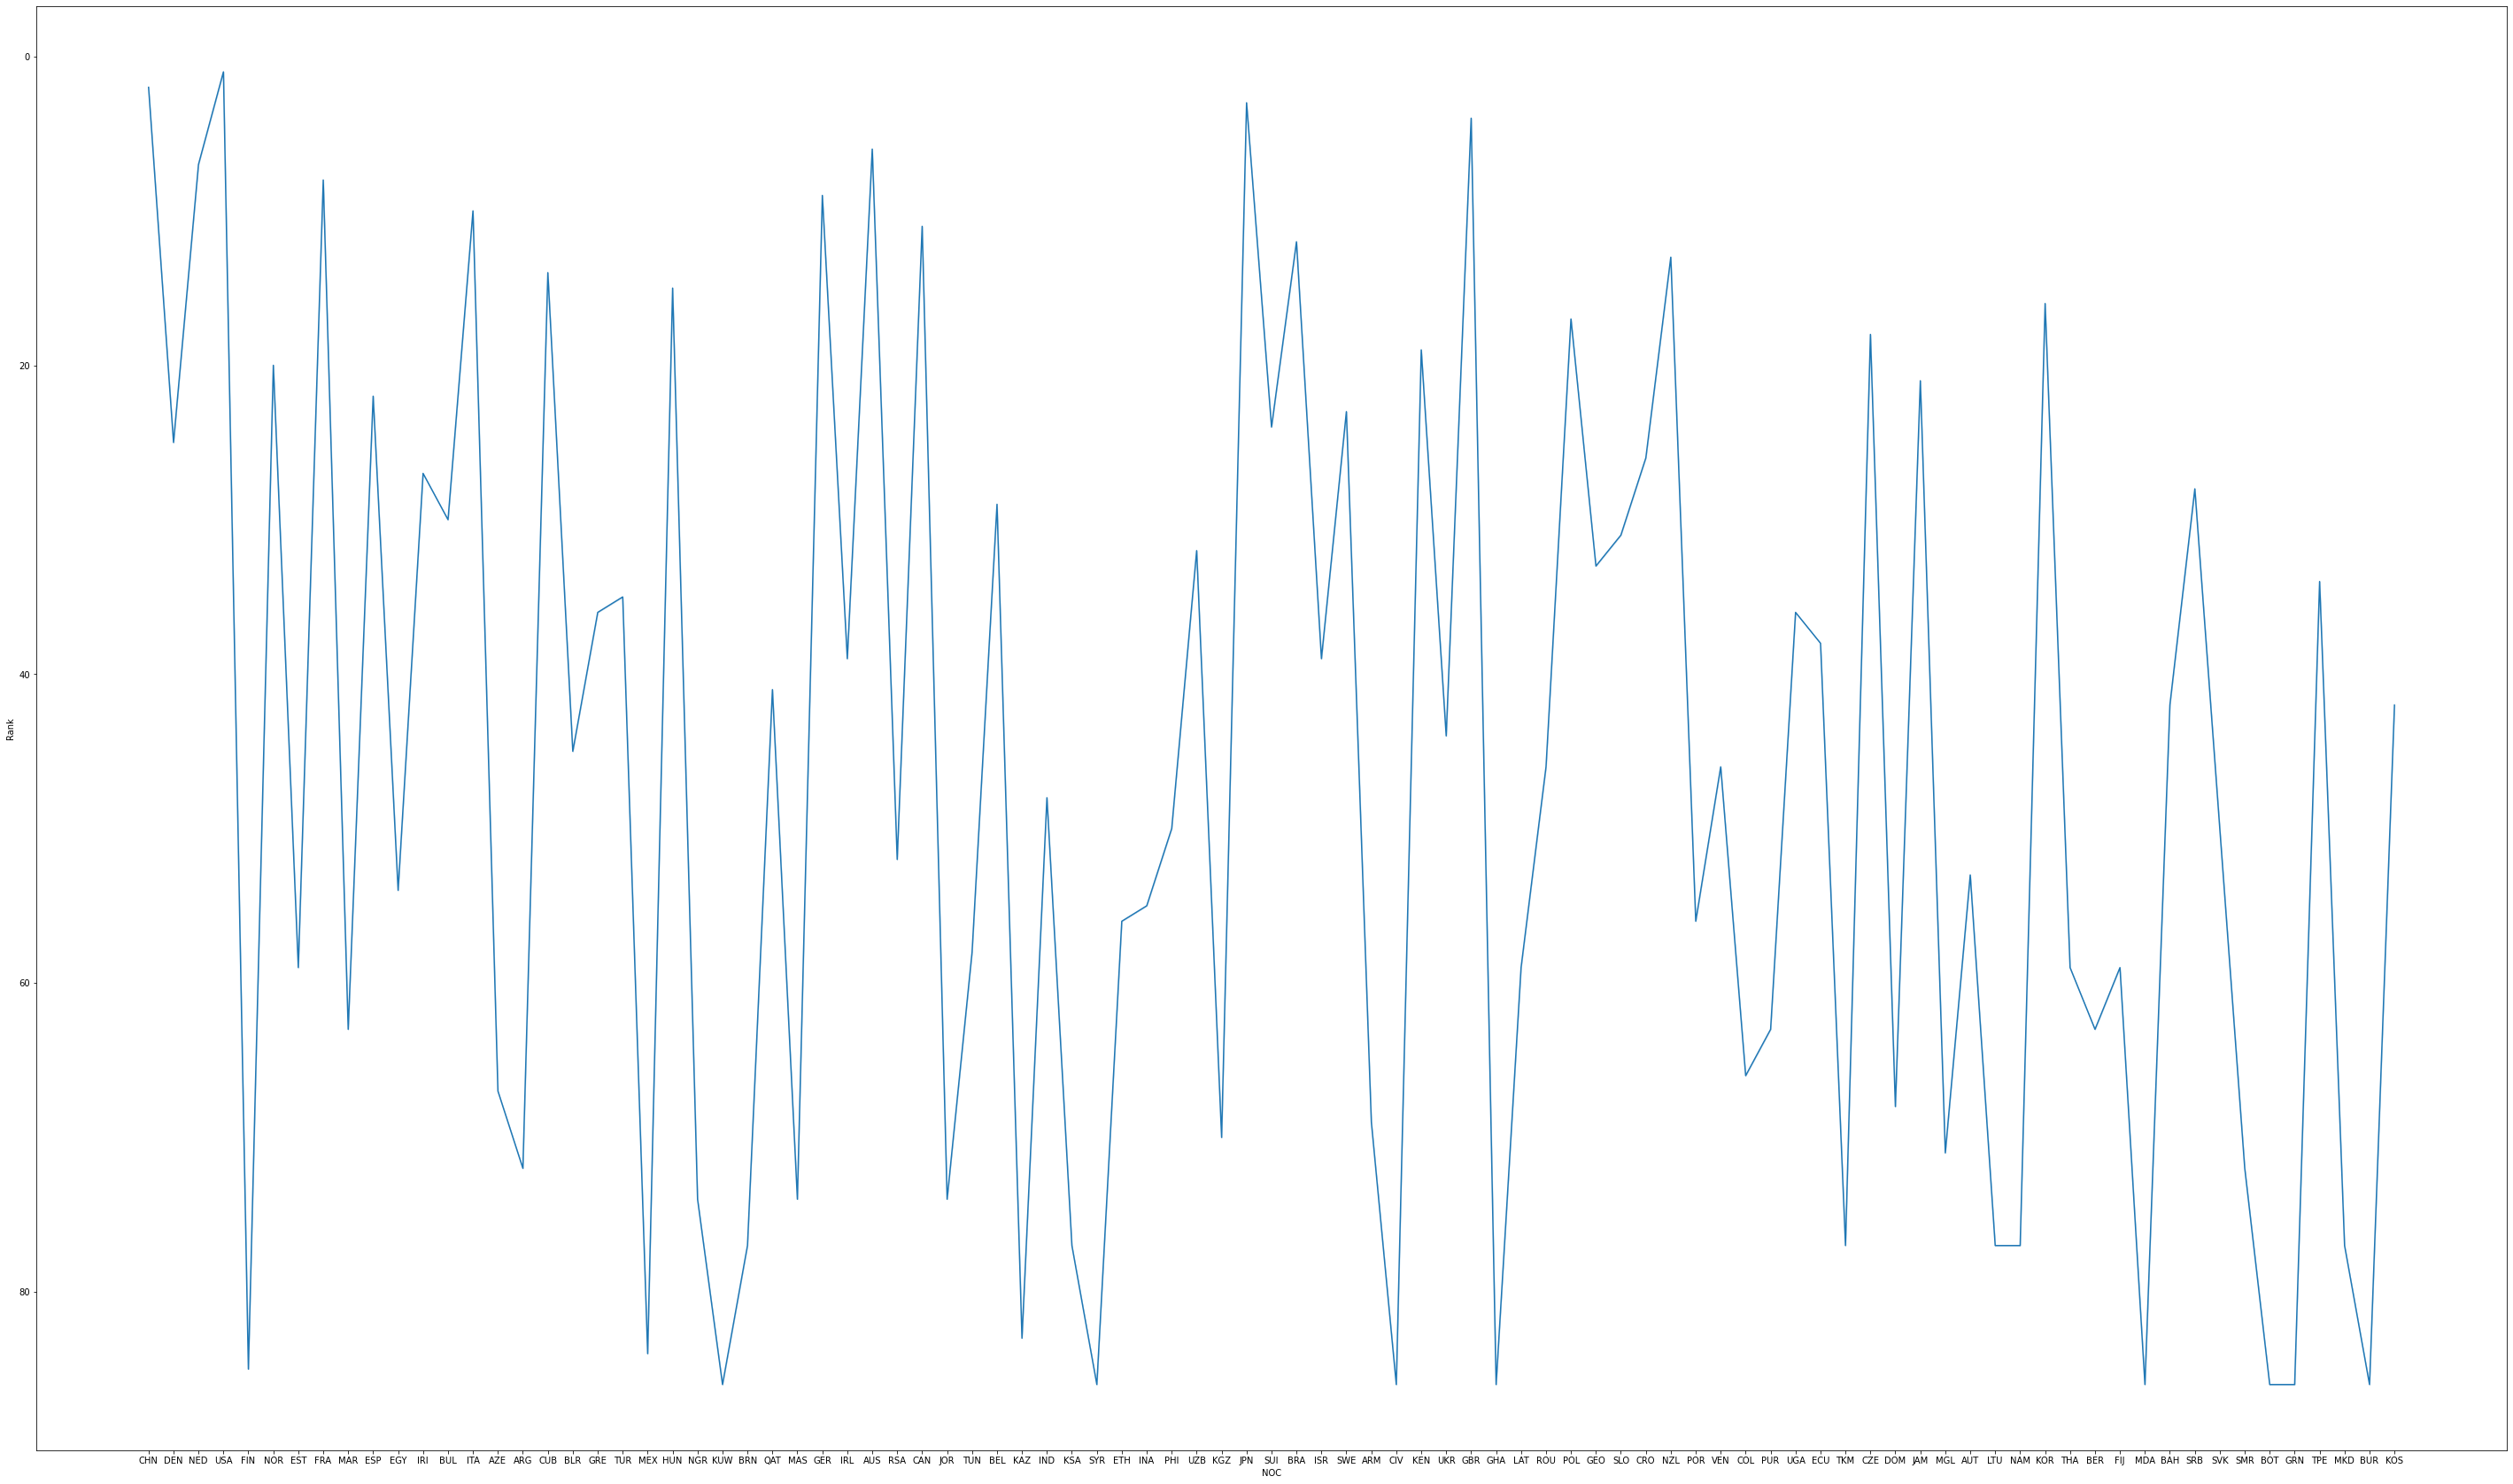

In [24]:
plt.figure(figsize=(50,30))
sns.lineplot(x='NOC',y='Rank',data=merged_medals_noc).invert_yaxis()

#  Feature Engineering

In [25]:
# Adding Body Mass Index as a new feature
merged_medals_noc['BMI'] = (df['Weight'])/(df['Height']**2)

In [26]:
# Adding Age Labels as a new feature
age_labels=pd.cut(df['Age'], [12,20,38] , labels=['Teenager','Adult'])
merged_medals_noc["Age_labels"]=age_labels

## Boxplot showing BMI for each region 

<AxesSubplot:xlabel='region', ylabel='BMI'>

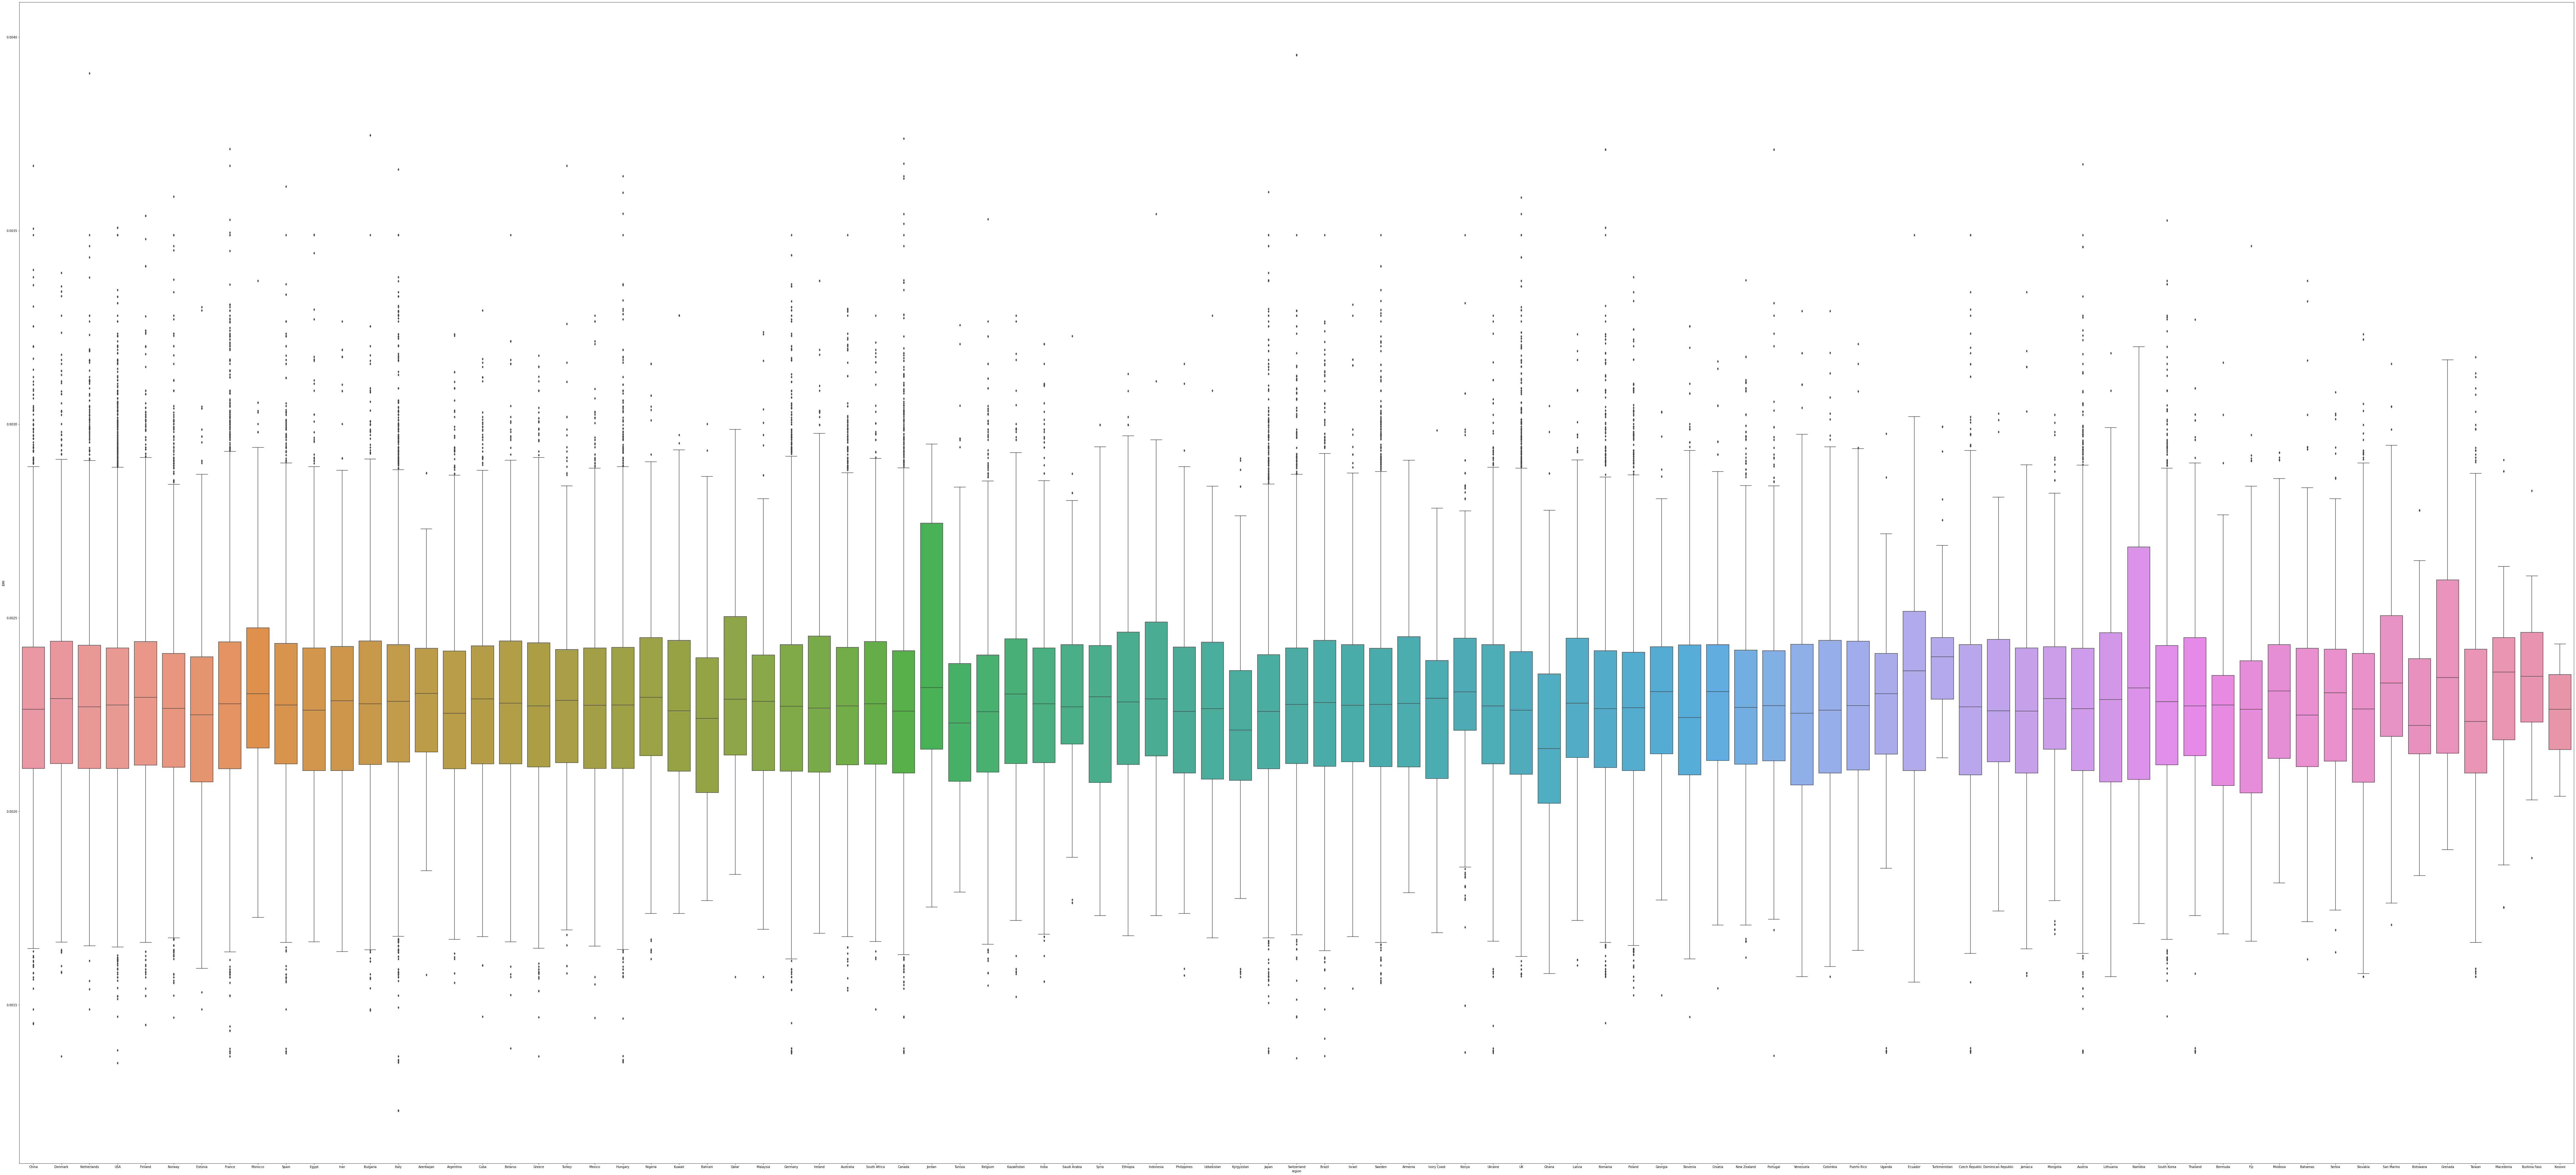

In [27]:
plt.figure(figsize=(150,70))
sns.boxplot(x='region',y='BMI',data=merged_medals_noc)

## Countplot for Total medals into consideration Age label

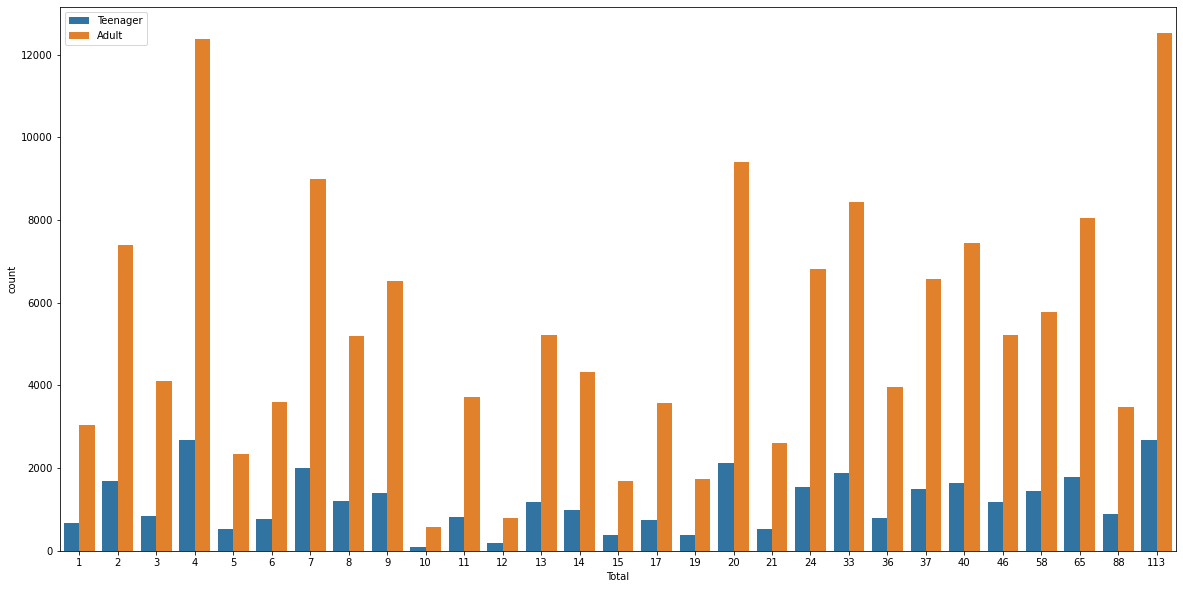

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='Total',hue='Age_labels',data=merged_medals_noc)
plt.legend(loc='upper left',fontsize=10)